## Objective

 Accepts user questions in natural language.

- Parses and understands data from a messy 85,000+ row dataset.

- Reads additional context from board meeting PDF and market summary TXT.

- Uses Gemini to generate business insights from combined data sources.

- Deploys the chatbot using Streamlit locally or on the web.

---
**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import PyPDF2
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings("ignore")

---
**Load Dataset**

In [2]:
df=pd.read_csv('customer_orders.csv')
df.head()

,Order ID,Order Date,Customer Name,Product Category,Region,Sales Channel,Units Sold,Unit Price,Order Notes,Revenue
0,1,2023-01-31,Sarah Wright,Groceries,North,Wholesale,69,4143,Rich vote represent black three conference tru...,285867
1,2,2023-12-30,Zoe Prince,Clothing,North,Online,54,2311,Today draw story Mrs few beyond thank serve sc...,124794
2,3,2022-05-10,David Waters,Furniture,North,Wholesale,56,2685,Man control movement exist society according w...,150360
3,4,2023-07-18,Keith Wilcox,Books,North,Retail,1,4391,Reach here oil receive piece able heavy reveal...,4391
4,5,2023-02-04,Robert Lester,Clothing,West,Online,59,1421,Right quality bill money idea city bit.,83839


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85000 entries, 0 to 84999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          85000 non-null  int64 
 1   Order Date        85000 non-null  object
 2   Customer Name     84150 non-null  object
 3   Product Category  84150 non-null  object
 4   Region            84150 non-null  object
 5   Sales Channel     85000 non-null  object
 6   Units Sold        85000 non-null  int64 
 7   Unit Price        85000 non-null  int64 
 8   Order Notes       85000 non-null  object
 9   Revenue           85000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 6.5+ MB


In [4]:
df.shape

(85000, 10)

---
**Handling missing values**

In [5]:
df.isnull().sum()

Order ID              0
Order Date            0
Customer Name       850
Product Category    850
Region              850
Sales Channel         0
Units Sold            0
Unit Price            0
Order Notes           0
Revenue               0
dtype: int64

In [6]:
df['Customer Name'].fillna('Unknown', inplace=True)
df['Product Category'].fillna('Unknown', inplace=True)
df['Region'].fillna('Unknown', inplace=True)

In [7]:
df.isnull().sum()

Order ID            0
Order Date          0
Customer Name       0
Product Category    0
Region              0
Sales Channel       0
Units Sold          0
Unit Price          0
Order Notes         0
Revenue             0
dtype: int64

---

In [8]:
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Month']=df['Order Date'].dt.to_period('M')

In [9]:
df.head(4)

,Order ID,Order Date,Customer Name,Product Category,Region,Sales Channel,Units Sold,Unit Price,Order Notes,Revenue,Month
0,1,2023-01-31,Sarah Wright,Groceries,North,Wholesale,69,4143,Rich vote represent black three conference tru...,285867,2023-01
1,2,2023-12-30,Zoe Prince,Clothing,North,Online,54,2311,Today draw story Mrs few beyond thank serve sc...,124794,2023-12
2,3,2022-05-10,David Waters,Furniture,North,Wholesale,56,2685,Man control movement exist society according w...,150360,2022-05
3,4,2023-07-18,Keith Wilcox,Books,North,Retail,1,4391,Reach here oil receive piece able heavy reveal...,4391,2023-07


---
Revenue Trend over time

In [10]:
monthly_revenue=df.groupby('Month')['Revenue'].sum().reset_index()

In [11]:
monthly_revenue['Month']=monthly_revenue['Month'].dt.to_timestamp()

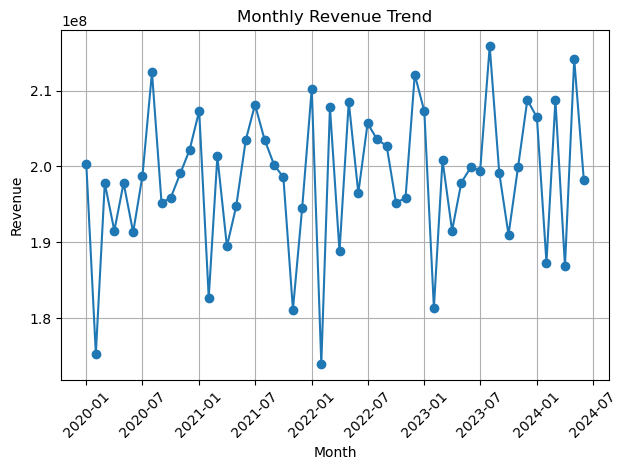

In [12]:
plt.plot(monthly_revenue['Month'],monthly_revenue['Revenue'],marker='o')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Monthly Revenue Trend')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

---
Region wise Revenue Contribution

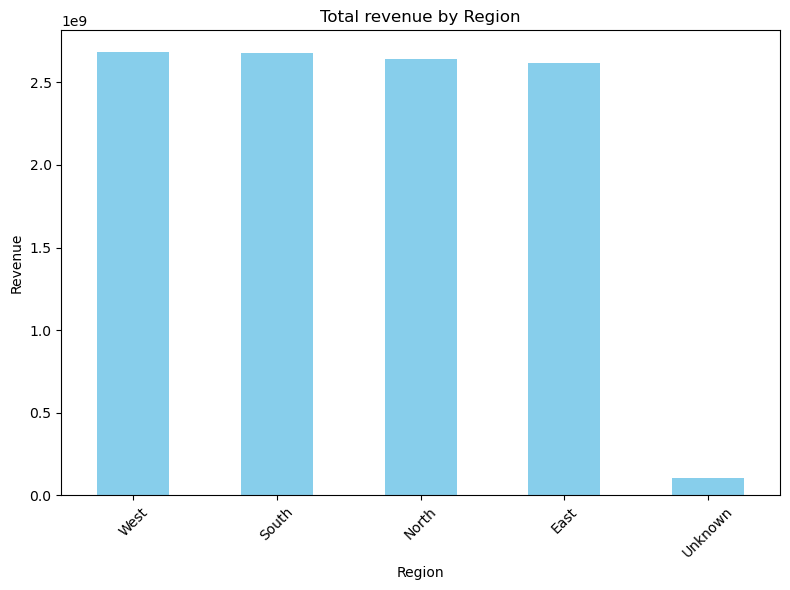

In [13]:
region_rev=df.groupby('Region')['Revenue'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,6))
region_rev.plot(kind='bar',color='skyblue')
plt.title('Total revenue by Region')
plt.xlabel('Region')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---
Analytics - Product Category,Region and Time trends

In [17]:
top_products_by_region=df.groupby(['Region','Product Category'])['Revenue'].sum().reset_index()
top_in_each_region=top_products_by_region.sort_values(by='Revenue',ascending=False).groupby('Region').first().reset_index()

In [18]:
top_in_each_region

,Region,Product Category,Revenue
0,East,Toys,381612453
1,North,Groceries,385422231
2,South,Clothing,393152247
3,Unknown,Groceries,15500244
4,West,Electronics,397982457


---
Quaterly Sales

In [20]:
df['Quarter']=df['Order Date'].dt.to_period('Q')
quarterly_trend=df.groupby(['Quarter','Region'])['Revenue'].sum().unstack().fillna(0)

In [21]:
quarterly_trend

Region,East,North,South,Unknown,West
Quarter,,,,,
2020Q1,133224975,148929754,141427303,4488214,145456889
2020Q2,150691462,143618884,136768700,6637649,142980085
2020Q3,144777013,145987980,157952388,5924642,151706724
2020Q4,149657680,139308821,152093829,5657739,150472554
2021Q1,138093228,143262437,152814329,6701981,150486991
2021Q2,143904885,139962273,146606613,6301239,150921603
2021Q3,149617871,145434216,157179554,5311290,154349328
2021Q4,136476345,138832621,152315674,5822018,140852670
2022Q1,135091526,148503457,147193959,5274898,156004613


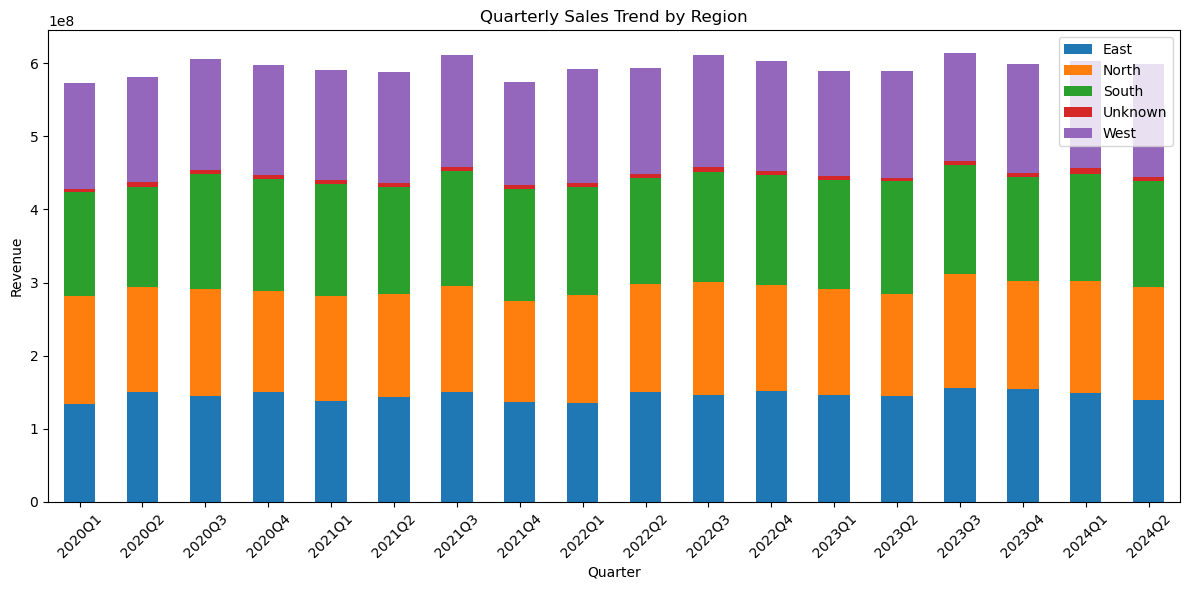

In [22]:
quarterly_trend.plot(kind='bar',stacked=True,figsize=(12,6))
plt.title('Quarterly Sales Trend by Region')
plt.xlabel('Quarter')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

---
import text Data

In [ ]:
with open('market_trends_extended.txt','r') as f:
  market_text=f.read()
  print(market_text)

---
import PDF data

In [ ]:
reader=PyPDF2.PdfReader('board_meeting_summary_long.pdf')
pdf_text=''
for page in reader.pages:
  pdf_text+=page.extract_text()

print(pdf_text)

---
Building Bot using Gemini